# Task 1- Prediction using Supervised ML 

## By Nikhil Dubey 
## Data Science & Business Analytics Intern at The Spark Foundation

# Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

# Importing data set

In [2]:
data_url="http://bit.ly/w-data"
students_data=pd.read_csv(data_url)

# Displaying the dataset as DataFrame

In [3]:
students_data.shape

(25, 2)

In [4]:
students_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory Data Analysis

In [5]:
students_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


c:\pyhon3.9\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

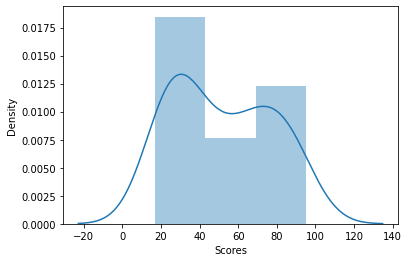

In [7]:
sns.distplot(students_data['Scores'])

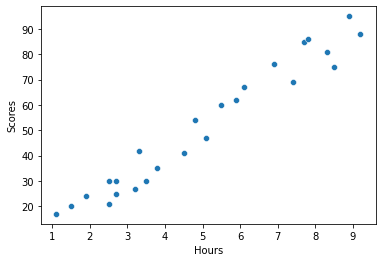

In [8]:
sns.scatterplot(x=students_data['Hours'],y=students_data['Scores'])
plt.show()

In [9]:
#Finding the correlation between data
students_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Model Development

In [10]:
x=students_data.iloc[:,:1]
y=students_data.iloc[:,1:]

# Splitting data into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Training the algorithm

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# Fitting the best line to the model

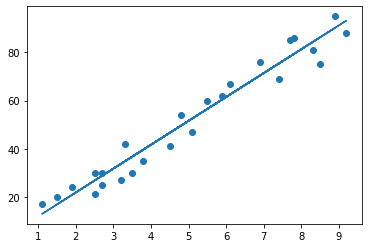

In [13]:
# Plotting the regression line
m=lr.coef_
c=lr.intercept_
line = m*x+c
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [14]:
x_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [15]:
#Printing predicted value
y_predicted=lr.predict(x_test)
y_predicted

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [16]:
#Printing actual Value
y_test.head()

,Scores
5,20
2,27
19,69
16,30
11,62


# Comparing actual scores and predicted scores

In [17]:
students_data['Predicted_scores']= line = m*x+c
students_data

,Hours,Scores,Predicted_scores
0,2.5,21,26.794801
1,5.1,47,52.562508
2,3.2,27,33.732261
3,8.5,75,86.258740
4,3.5,30,36.705458
5,1.5,20,16.884145
6,9.2,88,93.196200
7,5.5,60,56.526771
8,8.3,81,84.276609
9,2.7,25,28.776933


# Predicting the score if a student studies 9.25 hours per day

In [18]:
hours=9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


# Model Evaluation

In [19]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,y_predicted))

Mean Absolute Error: 4.183859899002975
